<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Salary         2064 non-null   int64
 1   # Connections  2064 non-null   int64
dtypes: int64(2)
memory usage: 32.4 KB


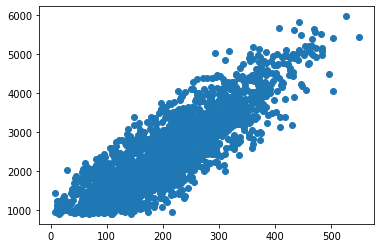

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
linkedin = pd.read_csv('linkedin.csv',delimiter=',')
linkedin.info()
plt.figure()
plt.scatter(linkedin['# Connections'],linkedin.Salary)
plt.show()

## CORRELATION COEFFICIENT

In [11]:
linkedin_scaled = pd.DataFrame(stats.zscore(linkedin))
linkedin_scaled

,Salary,# Connections
0,0.736521,0.991610
1,0.448105,0.059547
2,0.456230,-0.544176
3,0.739568,0.663270
4,-0.582676,-0.205244
...,...,...
2059,2.598021,1.139893
2060,2.607161,2.654496
2061,2.277108,2.643904
2062,2.437564,2.135506


In [12]:
cor_pear = (linkedin_scaled['Salary']*linkedin_scaled['# Connections']).mean()
cor_pear

0.8546038926852264

In [13]:
#x.cor(y) x,y --> arrays
#dataFrame.corr(method='pearson')
cor_pear = linkedin['# Connections'].corr(linkedin['Salary'])
linkedin.corr(method='pearson')
#very strong correlation -> 85%

,Salary,# Connections
Salary,1.000000,0.854604
# Connections,0.854604,1.000000


### OTHER TYPES OF CORRS
df.corr(method='kendall')   REQUIRES RANK NUMBERS
df.corr(method='spearman')

## LINEAR REGRESSION
### y = a+bx

In [14]:
import numpy as np
x = linkedin['# Connections']
y = linkedin.Salary
model = np.polyfit(x,y,1) # calculate b and a
model

array([  8.91306398, 651.64358457])

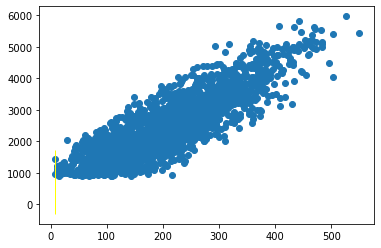

In [33]:
import math
predict = np.poly1d(model)
xx = np.arange(x.min(),x.max(),(x.max()-x.min()/100))
yy=predict(xx)
plt.figure()
plt.scatter(x,y)
plt.plot(xx,yy,color='red')
y_pred=predict(x)
se = math.sqrt(((y_pred-y)**2).mean())
plt.fill_between(xx,yy-2*se,yy+2*se,color='yellow')
plt.show()

In [16]:
#linear regression
R_squared = 1-(x.corr(y))**2
R_squared

0.2696521866072571

In [17]:
y_pred=predict(x)
se = math.sqrt(((y_pred-y)**2).mean())
sy=y.std()
R_squared=1-(se**2)/(sy**2)
R_squared

0.7304784588319901

In [18]:
def general_regression(x, y, degree=1, exp=False):
    data = pd.DataFrame({'x':x,'y':y})
    data.reset_index(drop=True, inplace=True)
    func=lambda x:x # def func(x): return[x]
    inv_func=lambda x:x
    if (exp):
        func=np.exp
        inv_func=np.log
    sy = data.y.std()
    model = np.polyfit(x, inv_func(y), degree)
    line = np.poly1d(model)
    predict = lambda x:func(line(x))
    data['y_pred'] = pd.Series(predict(x))
    se = math.sqrt(((data.y_pred-data.y)**2).mean())
    R2 = 1-(se**2)/(sy**2)
    result = [se, R2, predict]
    index = ['se', 'R2', 'predict']
    for i in range(1,len(model)+1):
        result = np.append(result, model[-i])
        index += chr(i+96) # to obtain the characters a,b,...
    result = pd.Series(result)
    result.index = index
    return result
#quadratic
general_regression(x,y,2)

se                                                506.155868
R2                                                  0.735906
predict    <function general_regression.<locals>.<lambda>...
a                                                 925.463808
b                                                   6.025736
c                                                   0.006274
dtype: object

In [19]:
#cubic
general_regression(x,y,3)

se                                                504.977829
R2                                                  0.737133
predict    <function general_regression.<locals>.<lambda>...
a                                                1118.425118
b                                                   2.600221
c                                                   0.022656
d                                                  -0.000022
dtype: object

In [20]:
#exponential
general_regression(x,y,1,exp=True)

se                                                529.452122
R2                                                  0.711036
predict    <function general_regression.<locals>.<lambda>...
a                                                   7.008575
b                                                   0.003554
dtype: object

In [21]:
#logarithmic
#not in the slides ;)))

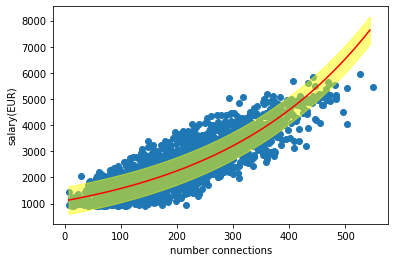

In [29]:
def plot_regressionline(reg_result, min, max, linecol="red", errorcol="#FFFF0080"):
    se = reg_result.se
    predict = reg_result.predict
    x = np.arange(min, max, (max-min)/100)
    y = predict(x)
    plt.fill_between(x, y-se, y+se, color=errorcol)
    plt.plot(x, y, color=linecol)
result = general_regression(x,y,1,exp=True)
plt.figure()
plt.scatter(x,y)
plot_regressionline(result,x.min(),x.max())
plt.xlabel('number connections')
plt.ylabel('salary(EUR)')
plt.show()

## STUDENT QUESTIONNAIRE

In [36]:
sq = pd.read_csv('Questionnaire 21-22.csv',delimiter=';',decimal=',')